### Exploratory analysis of Student Performance dataset using K-means Clustering

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("student-mat.csv",sep=";")
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

### Now, Let's remove the target and perform clusteing on the data

In [8]:
df.drop(['G3'],inplace=True,axis=1)

### We have the data fresh and ready for cluster analysis

In [10]:
df_new=df
df_new.head()           

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  romantic famrel  freetime  goout  Dalc Walc health absences  G1  G2  
0       no      4         3      4     1    1      3        6   5   6  
1       no      5         3      3     1    1      3        4   5   5  
2       no      4         3      2     2    3      3       10   7   8  
3      yes      3         2      2     1    1      5        2  15  14  
4       no      4         3      2     1    2      5        4   6  10  

[5 rows x 32 columns]

In [11]:
df_new.isnull().sum(axis = 0)



school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
dtype: int64

### From this, we can see that the  null values are dealt with completely. So we can move forward with our wrangling .

In [12]:
#Now, let's convert the categorical values into numenrcial so that they can be fed into the model
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [14]:
df_new['school'] = le.fit_transform(df_new['school'])
df_new['sex'] = le.fit_transform(df_new['sex'])
df_new['reason'] = le.fit_transform(df_new['reason'])
df_new['Pstatus'] = le.fit_transform(df_new['Pstatus'])
df_new['famsup'] = le.fit_transform(df_new['famsup'])
df_new['paid'] = le.fit_transform(df_new['paid'])
df_new['higher'] = le.fit_transform(df_new['higher'])
df_new['internet'] = le.fit_transform(df_new['internet'])
df_new['romantic'] = le.fit_transform(df_new['romantic'])

df_new.head()

school  sex  age address famsize  Pstatus  Medu  Fedu     Mjob      Fjob  \
0       0    0   18       U     GT3        0     4     4  at_home   teacher   
1       0    0   17       U     GT3        1     1     1  at_home     other   
2       0    0   15       U     LE3        1     1     1  at_home     other   
3       0    0   15       U     GT3        1     4     2   health  services   
4       0    0   16       U     GT3        1     3     3    other     other   

   ...  romantic famrel  freetime  goout  Dalc Walc  health  absences  G1  G2  
0  ...         0      4         3      4     1    1       3         6   5   6  
1  ...         0      5         3      3     1    1       3         4   5   5  
2  ...         0      4         3      2     2    3       3        10   7   8  
3  ...         1      3         2      2     1    1       5         2  15  14  
4  ...         0      4         3      2     1    2       5         4   6  10  

[5 rows x 32 columns]

In [15]:
st=preprocessing.StandardScaler()
df_new['studytime']=st.fit_transform(df_new[['studytime']])
df_new['absences']=st.fit_transform(df_new[['absences']])
df_new['G1']=st.fit_transform(df_new[['G1']])
df_new['G2']=st.fit_transform(df_new[['G2']])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/prepr

In [16]:
df_new.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [17]:
df.head()

school  sex  age address famsize  Pstatus  Medu  Fedu     Mjob      Fjob  \
0       0    0   18       U     GT3        0     4     4  at_home   teacher   
1       0    0   17       U     GT3        1     1     1  at_home     other   
2       0    0   15       U     LE3        1     1     1  at_home     other   
3       0    0   15       U     GT3        1     4     2   health  services   
4       0    0   16       U     GT3        1     3     3    other     other   

   ...  romantic famrel  freetime  goout  Dalc Walc  health  absences  \
0  ...         0      4         3      4     1    1       3  0.036424   
1  ...         0      5         3      3     1    1       3 -0.213796   
2  ...         0      4         3      2     2    3       3  0.536865   
3  ...         1      3         2      2     1    1       5 -0.464016   
4  ...         0      4         3      2     1    2       5 -0.213796   

         G1        G2  
0 -1.782467 -1.254791  
1 -1.782467 -1.520979  
2 -1.179147 -0.722415  
3  1.234133  0.874715  
4 -1.480807 -0.190038  

[5 rows x 32 columns]

In [21]:
df_new=df[['school','sex','reason','Pstatus','studytime','failures','famsup','paid','higher','internet','romantic','Dalc','health','absences','G1','G2']]


In [19]:
df_new.head()

school  sex  age address famsize  Pstatus  Medu  Fedu     Mjob      Fjob  \
0       0    0   18       U     GT3        0     4     4  at_home   teacher   
1       0    0   17       U     GT3        1     1     1  at_home     other   
2       0    0   15       U     LE3        1     1     1  at_home     other   
3       0    0   15       U     GT3        1     4     2   health  services   
4       0    0   16       U     GT3        1     3     3    other     other   

   ...  romantic famrel  freetime  goout  Dalc Walc  health  absences  \
0  ...         0      4         3      4     1    1       3  0.036424   
1  ...         0      5         3      3     1    1       3 -0.213796   
2  ...         0      4         3      2     2    3       3  0.536865   
3  ...         1      3         2      2     1    1       5 -0.464016   
4  ...         0      4         3      2     1    2       5 -0.213796   

         G1        G2  
0 -1.782467 -1.254791  
1 -1.782467 -1.520979  
2 -1.179147 -0.722415  
3  1.234133  0.874715  
4 -1.480807 -0.190038  

[5 rows x 32 columns]

### Now the data is ready for k-means clustering

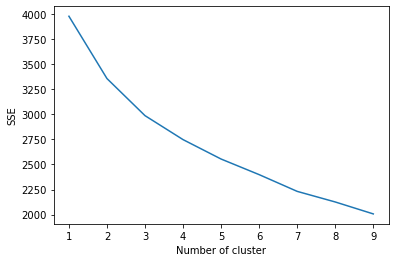

In [22]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_new)
    df["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### Looking at the elbow curve, we can see that the optimum K value is 3

In [24]:
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(df_new)
df_new["clusters"] = kmeans.labels_

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
dfclust_0=df_new[df_new['clusters']==0]
dfclust_1=df_new[df_new['clusters']==1]
dfclust_2=df_new[df_new['clusters']==2]



In [32]:
#CLuster 0 -CLuster with High G1 and G2 marks and Good health, with internet,with high studytime  and Interest in higher studies
dfclust_0.head()

school  sex  reason  Pstatus  studytime  failures  famsup  paid  higher  \
3        0    0       1        1   1.150779         0       1     1       1   
5        0    1       3        1  -0.042286         0       1     1       1   
9        0    1       1        1  -0.042286         0       1     1       1   
11       0    0       3        1   1.150779         0       1     0       1   
12       0    1       0        1  -1.235351         0       1     1       1   

    internet  romantic  Dalc  health  absences        G1        G2  clusters  
3          1         1     1       5 -0.464016  1.234133  0.874715         0  
5          1         0     1       5  0.536865  1.234133  1.140903         0  
9          1         0     1       5 -0.714236  0.932473  1.140903         0  
11         1         0     1       4 -0.213796 -0.274167  0.342338         0  
12         1         0     1       5 -0.464016  0.932473  0.874715         0

In [34]:
#CLuster 1 Cluster with Low marks,Low health and struggle to pay for education
dfclust_1.head()

school  sex  reason  Pstatus  studytime  failures  famsup  paid  higher  \
6        0    1       1        1  -0.042286         0       0     0       1   
7        0    0       1        0  -0.042286         0       1     0       1   
8        0    1       1        0  -0.042286         0       1     1       1   
10       0    0       3        1  -0.042286         0       1     1       1   
15       0    0       1        1  -1.235351         0       1     0       1   

    internet  romantic  Dalc  health  absences        G1        G2  clusters  
6          1         0     1       3 -0.714236  0.329153  0.342338         1  
7          0         0     1       1  0.036424 -1.480807 -1.520979         1  
8          1         0     1       1 -0.714236  1.535793  1.939468         1  
10         1         0     1       2 -0.714236 -0.274167 -0.722415         1  
15         1         0     1       2 -0.213796  0.932473  0.874715         1

In [35]:
#Cluster-2  Cluster  decent health,decent grades and low studytime 
dfclust_2.head()

school  sex  reason  Pstatus  studytime  failures  famsup  paid  higher  \
0        0    0       0        0  -0.042286         0       0     0       1   
1        0    0       0        1  -0.042286         0       1     0       1   
2        0    0       2        1  -0.042286         3       0     1       1   
4        0    0       1        1  -0.042286         0       1     1       1   
13       0    1       0        1  -0.042286         0       1     1       1   

    internet  romantic  Dalc  health  absences        G1        G2  clusters  
0          0         0     1       3  0.036424 -1.782467 -1.254791         2  
1          1         0     1       3 -0.213796 -1.782467 -1.520979         2  
2          1         0     2       3  0.536865 -1.179147 -0.722415         2  
4          0         0     1       5 -0.213796 -1.480807 -0.190038         2  
13         1         0     1       3 -0.464016 -0.274167 -0.190038         2

## Through the analysis done above, we can see that there is a high correlation between the health of the  student, the study time and their final grades. This can be seen clearly from the three  clusters formed 